In [1]:
# Dependencies
import numpy as np

#required dependencies for this project
import pandas as pd
import datetime as dt
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
temp_june = []
temp_june = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date) == 6).all()

In [5]:
#  3. Convert the June temperatures to a list.

temp_june_list = list(np.ravel(temp_june))

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 


june_df = pd.DataFrame(temp_june,columns = ['date','June Temp'])
june_df.set_index(june_df['date'],inplace=True)

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.

june_df.describe()

,June Temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


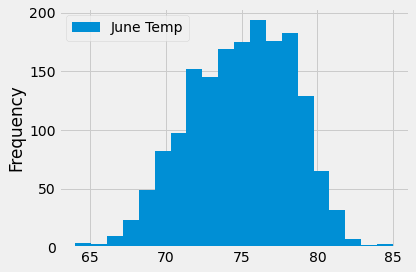

In [8]:
## PLotting the graphs

june_df.plot.hist(bins=20)
plt.tight_layout()

In [16]:
June_pre = session.query(Measurement.prcp).\
    filter(extract('month',Measurement.date)==6).all()

June_pre_df = pd.DataFrame(June_pre,columns=['June Precipitation'])
June_pre_summary_df = June_pre_df.describe()

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
temp_dec = []
temp_dec = session.query(Measurement.date, Measurement.tobs).filter(extract('month',Measurement.date) == 12).all()

In [10]:
# 7. Convert the December temperatures to a list.

temp_dec_tolist = list(np.ravel(temp_dec))

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 

dec_df = pd.DataFrame(temp_dec, columns = ['date','December Temp'])
dec_df.set_index(dec_df['date'],inplace=True)

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.

dec_df.describe()

,December Temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


Additional Query and Information on Weather:

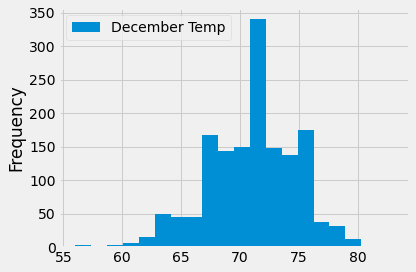

In [14]:
##Plotting the graphs 

dec_df.plot.hist(bins=20)
plt.tight_layout()

In [18]:
Dec_pre = session.query(Measurement.prcp).\
filter(extract('month',Measurement.date)==12).all()
Dec_pre_df = pd.DataFrame(Dec_pre,columns=['Dec Precipitation'])
Dec_pre_summary_df = Dec_pre_df.describe()

In [19]:
Prec_df = pd.merge(June_pre_summary_df, Dec_pre_summary_df,left_index=True,right_index=True)
Prec_df

,June Precipitation,Dec Precipitation
count,1574.000000,1405.000000
mean,0.136360,0.216819
std,0.335731,0.541399
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.020000,0.030000
75%,0.120000,0.150000
max,4.430000,6.420000
